# 1. Set up an execution environment

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# 2. Read data

## 2.1 Import data

In [ ]:
data = pd.read_csv('./data/TAB_Betting_Data.csv')

## 2.2 EDA

### 2.2.1 Data statistics

In [4]:
data.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [6]:
data.shape

(12364101, 16)

In [7]:
data.duplicated().value_counts()

False    12364101
dtype: int64

In [8]:
data.isnull().sum()

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

In [9]:
data['DATE_DIM'] = pd.to_datetime(data['DATE_DIM'])

In [10]:
data.describe()

,BET_ACCOUNT_NUM_HASH,AGE,TENURE_IN_DAYS,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
count,1.236410e+07,1.236142e+07,1.236410e+07,8.576656e+06,1.779580e+06,8.527489e+06,15678.000000,1.236410e+07,1.236410e+07,1.236410e+07,1.236410e+07
mean,2.144468e+09,5.314939e+01,3.437851e+03,1.235937e+02,1.278436e+02,1.063339e+02,37.800517,1.775206e+02,1.467335e+02,2.771342e+01,2.212268e+01
std,1.240403e+09,1.536221e+01,3.416204e+03,5.274644e+02,7.873640e+02,3.022158e+02,91.525587,6.407664e+02,6.863462e+02,2.300061e+02,6.451099e+01
min,1.315400e+04,1.800000e+01,-1.000000e+00,-1.000000e+03,-5.500000e+02,0.000000e+00,0.000000,-1.000000e+03,-2.550000e+03,-1.123050e+05,1.000000e+00
25%,1.067720e+09,4.100000e+01,9.550000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.000000,1.600000e+01,0.000000e+00,1.888508e+00,2.000000e+00
50%,2.151297e+09,5.400000e+01,2.316000e+03,3.000000e+01,2.300000e+01,3.000000e+01,11.000000,5.000000e+01,1.435000e+01,1.099573e+01,7.000000e+00
75%,3.217306e+09,6.500000e+01,4.708000e+03,9.000000e+01,7.200000e+01,9.575000e+01,32.000000,1.450000e+02,9.561000e+01,4.000000e+01,2.000000e+01
max,4.294965e+09,1.040000e+02,2.132900e+04,2.267710e+05,1.987243e+05,2.482320e+05,2368.000000,2.648910e+05,4.137750e+05,8.088635e+04,1.911400e+04


In [11]:
data['TOTAL_TURNOVER'].sum()

2194882204.9599986

In [12]:
data[data['AGE'].isnull()]

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
5145,2021-01-01,Fri,1080370257,NaN,Unknown,M,7427,WA,NaN,NaN,40.00,NaN,40.00,0.00,8.000896,5
5768,2021-01-01,Fri,1208532057,NaN,Unknown,M,8122,WA,5.0,NaN,22.50,NaN,27.50,14.60,6.957070,40
13803,2021-01-01,Fri,2969320105,NaN,Unknown,M,8632,WA,NaN,NaN,108.00,NaN,108.00,92.20,16.941853,31
16044,2021-01-01,Fri,3461584997,NaN,Unknown,M,7742,WA,25.0,NaN,8.50,NaN,33.50,73.15,-42.917393,7
16286,2021-01-01,Fri,3512123314,NaN,Unknown,M,10711,WA,NaN,NaN,0.50,NaN,0.50,0.00,0.099074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12344827,2022-12-31,Sat,1208532057,NaN,Unknown,M,8851,WA,1.0,NaN,6.50,NaN,7.50,24.36,2.152913,7
12350286,2022-12-31,Sat,2100229039,NaN,Unknown,M,8865,WA,NaN,NaN,4.00,NaN,4.00,0.00,0.611098,2
12355769,2022-12-31,Sat,2969320105,NaN,Unknown,M,9361,WA,5.0,NaN,26.00,NaN,31.00,16.90,9.007916,14
12358874,2022-12-31,Sat,3461584997,NaN,Unknown,M,8471,WA,33.0,NaN,18.00,NaN,51.00,53.20,-5.890960,60


In [13]:
total_with_null_Age = data[data['AGE'].isnull()]['TOTAL_TURNOVER'].sum()
total_with_null_Age

109498.79000000001

In [14]:
total = data['TOTAL_TURNOVER'].sum()
total

2194882204.9599986

In [15]:
print('% in total turnover of data_Without_null_Age: ', round(total_with_null_Age/total*100, 5),'%')

% in total turnover of data_Without_null_Age:  0.00499 %


In [16]:
unique_bet_account_num_hash = data[data['AGE'].isnull()]['BET_ACCOUNT_NUM_HASH'].unique()

In [17]:
data[data['BET_ACCOUNT_NUM_HASH'].isin(unique_bet_account_num_hash)]

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
5145,2021-01-01,Fri,1080370257,NaN,Unknown,M,7427,WA,NaN,NaN,40.00,NaN,40.00,0.00,8.000896,5
5768,2021-01-01,Fri,1208532057,NaN,Unknown,M,8122,WA,5.0,NaN,22.50,NaN,27.50,14.60,6.957070,40
13803,2021-01-01,Fri,2969320105,NaN,Unknown,M,8632,WA,NaN,NaN,108.00,NaN,108.00,92.20,16.941853,31
16044,2021-01-01,Fri,3461584997,NaN,Unknown,M,7742,WA,25.0,NaN,8.50,NaN,33.50,73.15,-42.917393,7
16286,2021-01-01,Fri,3512123314,NaN,Unknown,M,10711,WA,NaN,NaN,0.50,NaN,0.50,0.00,0.099074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12344827,2022-12-31,Sat,1208532057,NaN,Unknown,M,8851,WA,1.0,NaN,6.50,NaN,7.50,24.36,2.152913,7
12350286,2022-12-31,Sat,2100229039,NaN,Unknown,M,8865,WA,NaN,NaN,4.00,NaN,4.00,0.00,0.611098,2
12355769,2022-12-31,Sat,2969320105,NaN,Unknown,M,9361,WA,5.0,NaN,26.00,NaN,31.00,16.90,9.007916,14
12358874,2022-12-31,Sat,3461584997,NaN,Unknown,M,8471,WA,33.0,NaN,18.00,NaN,51.00,53.20,-5.890960,60


### 2.2.2 Data preprocessing

Remove null age

In [18]:
data_without_null_age = data.dropna(subset=['AGE'])
data_without_null_age

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364096,2022-12-31,Sat,4293715592,61.0,55-64,F,6871,WA,28.0,NaN,53.0,NaN,81.0,103.10,38.770481,33
12364097,2022-12-31,Sat,4294296954,30.0,25-34,U,14,OTH,450.0,NaN,NaN,NaN,450.0,475.00,-25.000000,9
12364098,2022-12-31,Sat,4294378139,46.0,45-54,U,2062,WA,5.0,NaN,NaN,NaN,5.0,0.00,5.000000,1
12364099,2022-12-31,Sat,4294561160,33.0,25-34,F,3560,WA,70.0,NaN,18.0,NaN,88.0,0.00,73.659467,12


In [19]:
data['BET_ACCOUNT_NUM_HASH'].nunique()

144869

In [20]:
data_without_null_age['BET_ACCOUNT_NUM_HASH'].nunique()

144859

In [21]:
print('Max: ',data_without_null_age['DATE_DIM'].max())
print('Min: ',data_without_null_age['DATE_DIM'].min())

Max:  2022-12-31 00:00:00
Min:  2021-01-01 00:00:00


In [22]:
data_without_null_age['DATE_DIM'].nunique()

730

In [23]:
data_without_null_age['FOB_RACING_TURNOVER'].max()

226771.0

In [24]:
data_without_null_age['FOB_RACING_TURNOVER'].min()

-1000.0

Remove invalid data

In [25]:
data_without_null_age[data_without_null_age['FOB_RACING_TURNOVER']<0].shape[0]

168

In [26]:
data_without_null_age['FOB_SPORT_TURNOVER'].max()

198724.27

In [27]:
data_without_null_age['FOB_SPORT_TURNOVER'].min()

-550.0

In [28]:
data_without_null_age[data_without_null_age['FOB_SPORT_TURNOVER']<0].shape[0]

107

In [29]:
data_without_null_age[(data_without_null_age['FOB_SPORT_TURNOVER']<0) | (data_without_null_age['FOB_RACING_TURNOVER']<0)].shape[0]

274

In [30]:
data_without_null_age[(data_without_null_age['FOB_SPORT_TURNOVER']<0) | (data_without_null_age['FOB_RACING_TURNOVER']<0)]

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
72997,2021-01-04,Mon,2891817917,37.0,35-44,M,15,WA,NaN,-1.0,1.0,NaN,0.0,0.00,-0.799984,2
75697,2021-01-04,Mon,3981376054,23.0,18-24,M,982,OTH,NaN,-0.5,NaN,NaN,-0.5,0.00,-0.500000,4
116589,2021-01-08,Fri,17145370,41.0,35-44,M,3091,WA,169.0,-25.0,7.0,NaN,151.0,254.10,-78.909407,10
116813,2021-01-08,Fri,75449323,73.0,65+,M,3952,WA,NaN,-15.0,NaN,NaN,-15.0,0.00,-15.000000,2
117352,2021-01-08,Fri,227233087,67.0,65+,M,4318,WA,10.0,-5.0,73.0,NaN,78.0,48.23,19.605397,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262690,2022-11-02,Wed,3635954232,60.0,55-64,U,1214,WA,-4.0,NaN,NaN,NaN,-4.0,-60.00,56.000000,1
11262733,2022-11-02,Wed,3647222964,40.0,35-44,U,2587,WA,-1.0,NaN,NaN,NaN,-1.0,-7.50,6.500000,1
11263660,2022-11-02,Wed,3890974038,45.0,45-54,U,1,WA,-10.0,NaN,NaN,NaN,-10.0,-53.50,43.500000,1
11264159,2022-11-02,Wed,4028587576,29.0,25-34,U,1460,WA,-40.0,NaN,NaN,NaN,-40.0,-400.00,360.000000,5


In [31]:
data_without_null_age = data_without_null_age[~(data_without_null_age['FOB_SPORT_TURNOVER'] < 0) & ~(data_without_null_age['FOB_RACING_TURNOVER'] < 0)]

In [32]:
data_without_null_age['PARI_RACING_TURNOVER'].max()

248232.0

In [33]:
data_without_null_age['PARI_RACING_TURNOVER'].min()

0.0

In [34]:
data_without_null_age['PARI_SPORT_TURNOVER'].max()

2368.0

In [35]:
data_without_null_age['PARI_SPORT_TURNOVER'].min()

0.0

=> Can create time series data of 144859 customers from 1/1/21 -> 12/31/22

In [36]:
data_without_null_age[data_without_null_age['DATE_DIM']=='2022-12-31']

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
12337174,2022-12-31,Sat,13154,67.0,65+,M,12575,WA,NaN,NaN,28.0,NaN,28.0,0.00,7.003877,28
12337175,2022-12-31,Sat,18379,54.0,45-54,M,2613,WA,60.0,NaN,NaN,NaN,60.0,0.00,60.000000,2
12337176,2022-12-31,Sat,559232,63.0,55-64,M,3595,WA,17.0,NaN,52.0,NaN,69.0,27.96,22.488452,18
12337177,2022-12-31,Sat,698904,70.0,65+,M,2829,WA,NaN,NaN,364.5,NaN,364.5,314.94,77.625635,34
12337178,2022-12-31,Sat,762921,67.0,65+,M,5495,WA,3.0,NaN,160.5,NaN,163.5,4.93,35.081506,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364096,2022-12-31,Sat,4293715592,61.0,55-64,F,6871,WA,28.0,NaN,53.0,NaN,81.0,103.10,38.770481,33
12364097,2022-12-31,Sat,4294296954,30.0,25-34,U,14,OTH,450.0,NaN,NaN,NaN,450.0,475.00,-25.000000,9
12364098,2022-12-31,Sat,4294378139,46.0,45-54,U,2062,WA,5.0,NaN,NaN,NaN,5.0,0.00,5.000000,1
12364099,2022-12-31,Sat,4294561160,33.0,25-34,F,3560,WA,70.0,NaN,18.0,NaN,88.0,0.00,73.659467,12


### 2.2.3 Data extraction

Customer data (Demographic)

In [37]:
CusData = data_without_null_age.groupby('BET_ACCOUNT_NUM_HASH')

In [38]:
CusData = CusData.head(1)
CusData.drop(['FOB_RACING_TURNOVER','FOB_SPORT_TURNOVER','PARI_RACING_TURNOVER','PARI_SPORT_TURNOVER','TOTAL_TURNOVER','DIVIDENDS_PAID','GROSS_MARGIN','TICKETS','DATE_DIM','DAY_OF_WEEK'], axis=1, inplace=True)
CusData

<ipython-input-38-0f9cfd4edd20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CusData.drop(['FOB_RACING_TURNOVER','FOB_SPORT_TURNOVER','PARI_RACING_TURNOVER','PARI_SPORT_TURNOVER','TOTAL_TURNOVER','DIVIDENDS_PAID','GROSS_MARGIN','TICKETS','DATE_DIM','DAY_OF_WEEK'], axis=1, inplace=True)


,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE
0,13154,67.0,65+,M,11846,WA
1,18379,54.0,45-54,M,1884,WA
2,559232,63.0,55-64,M,2866,WA
3,698904,69.0,65+,M,2100,WA
4,762921,67.0,65+,M,4766,WA
...,...,...,...,...,...,...
12363493,4196263976,56.0,55-64,U,4,OTH
12363669,4226875493,36.0,35-44,U,0,OTH
12363787,4245765385,30.0,25-34,U,60,WA
12364068,4289621869,52.0,45-54,M,0,WA


Analysis customer data

Text(0.5, 1.0, 'Phân phối theo độ tuổi')

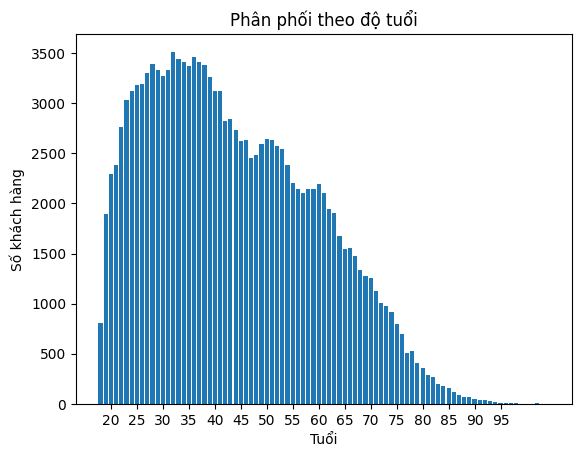

In [39]:
age_distribution = CusData['AGE'].value_counts()
plt.bar(age_distribution.index, age_distribution.values)
plt.xticks(range(20, 100, 5))
plt.xlabel("Tuổi")
plt.ylabel("Số khách hàng")
plt.title("Phân phối theo độ tuổi")

In [40]:
# Min and max of AGE
print(data_without_null_age['AGE'].min())
print(data_without_null_age['AGE'].max())

18.0
104.0


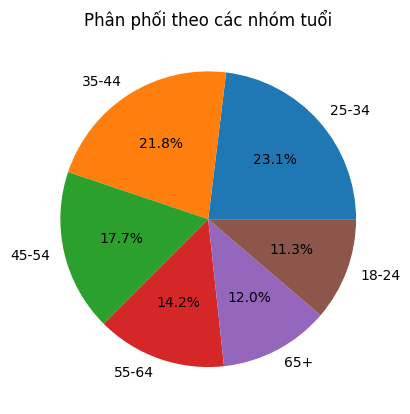

In [41]:
age_band_counts = CusData['AGE_BAND'].value_counts()
plt.pie(age_band_counts, labels=age_band_counts.index, autopct="%1.1f%%")
plt.title("Phân phối theo các nhóm tuổi")
plt.show()

In [42]:
age_band_counts

25-34    33401
35-44    31545
45-54    25597
55-64    20572
65+      17429
18-24    16315
Name: AGE_BAND, dtype: int64

In [43]:
# Thống kê các chỉ số thống kê cho trường "Age"
age_stats = CusData['AGE'].describe()
print(age_stats)


count    144859.000000
mean         43.634520
std          15.908986
min          18.000000
25%          31.000000
50%          41.000000
75%          55.000000
max         104.000000
Name: AGE, dtype: float64


In [44]:
age_band_counts

25-34    33401
35-44    31545
45-54    25597
55-64    20572
65+      17429
18-24    16315
Name: AGE_BAND, dtype: int64

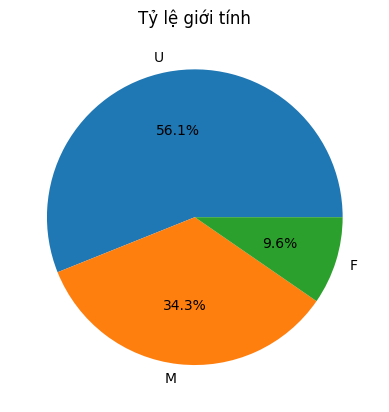

In [45]:
gender_counts = CusData['GENDER'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Tỷ lệ giới tính")
plt.show()

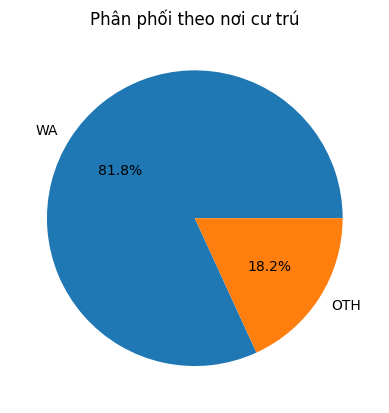

In [46]:
national_counts = CusData['RESIDENTIAL_STATE'].value_counts()
plt.pie(national_counts, labels=national_counts.index, autopct="%1.1f%%")
plt.title("Phân phối theo nơi cư trú")
plt.show()

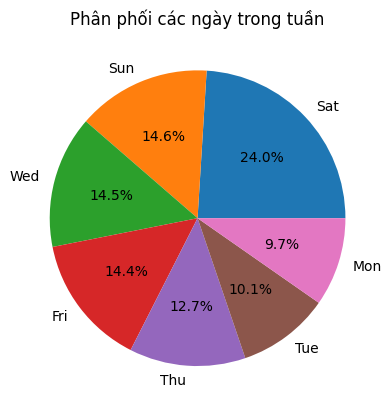

In [48]:
DayOfWeek_counts = data_without_null_age['DAY_OF_WEEK'].value_counts()
plt.pie(DayOfWeek_counts, labels=DayOfWeek_counts.index, autopct="%1.1f%%")
plt.title("Phân phối các ngày trong tuần")
plt.show()

In [49]:
DayOfWeek_counts

Sat    2969165
Sun    1806308
Wed    1790532
Fri    1780354
Thu    1571650
Tue    1244195
Mon    1198947
Name: DAY_OF_WEEK, dtype: int64

In [50]:
data_without_null_age['MONTH_OF_YEAR'] = data_without_null_age['DATE_DIM'].dt.month
count_each_months = data_without_null_age['MONTH_OF_YEAR'].value_counts()
count_each_months

<ipython-input-50-0e0a8f950922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_null_age['MONTH_OF_YEAR'] = data_without_null_age['DATE_DIM'].dt.month


11    1163284
10    1092407
12    1075064
7     1045161
4     1044922
1     1026713
3     1025869
9     1019255
5     1005701
8      986167
6      969327
2      907281
Name: MONTH_OF_YEAR, dtype: int64

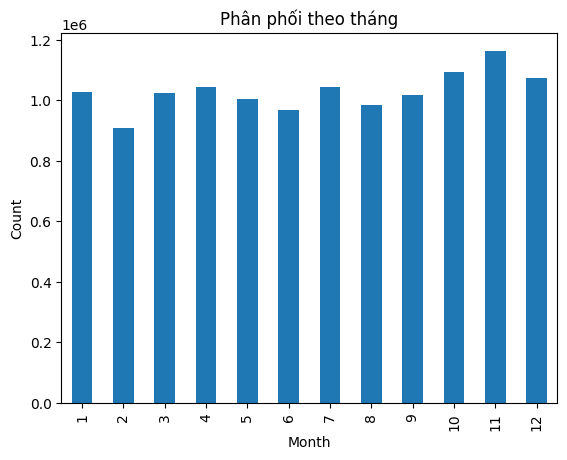

In [51]:
count_each_months.sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Phân phối theo tháng')
plt.show()

<Axes: ylabel='Frequency'>

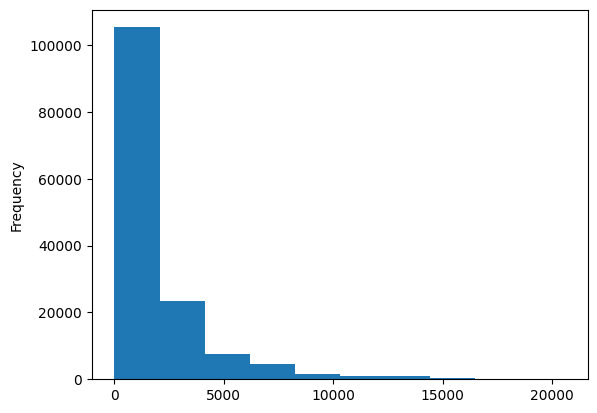

In [52]:
CusData['TENURE_IN_DAYS'].plot.hist()

In [53]:
CusData['TENURE_IN_DAYS'].value_counts().sort_index()

-1           24
 0        29176
 1         6648
 2         2128
 3         1228
          ...  
 18651        1
 18895        1
 19261        1
 19270        1
 20600        1
Name: TENURE_IN_DAYS, Length: 10754, dtype: int64

In [54]:
CusData['TENURE_IN_DAYS'].max()

20600

In [55]:
(CusData['TENURE_IN_DAYS'].max())//365

56

Transaction data

In [56]:
transactionData = data_without_null_age[['DATE_DIM','DAY_OF_WEEK','MONTH_OF_YEAR','BET_ACCOUNT_NUM_HASH','FOB_RACING_TURNOVER',	'FOB_SPORT_TURNOVER',	'PARI_RACING_TURNOVER',	'PARI_SPORT_TURNOVER',	'TOTAL_TURNOVER',	'DIVIDENDS_PAID',	'GROSS_MARGIN',	'TICKETS']]
transactionData

,DATE_DIM,DAY_OF_WEEK,MONTH_OF_YEAR,BET_ACCOUNT_NUM_HASH,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,1,13154,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,1,18379,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,1,559232,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,1,698904,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,1,762921,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12364096,2022-12-31,Sat,12,4293715592,28.0,NaN,53.0,NaN,81.0,103.10,38.770481,33
12364097,2022-12-31,Sat,12,4294296954,450.0,NaN,NaN,NaN,450.0,475.00,-25.000000,9
12364098,2022-12-31,Sat,12,4294378139,5.0,NaN,NaN,NaN,5.0,0.00,5.000000,1
12364099,2022-12-31,Sat,12,4294561160,70.0,NaN,18.0,NaN,88.0,0.00,73.659467,12


Analysis transaction data

In [57]:
grouped_Week = transactionData.groupby(['DAY_OF_WEEK'])
Wresults = grouped_Week[['TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS']].sum()
Wresults = Wresults.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
Wresults

,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
DAY_OF_WEEK,,,,
Mon,1.830985e+08,1.518528e+08,2.797092e+07,24275526
Tue,2.012003e+08,1.639771e+08,3.368840e+07,27449184
Wed,2.949246e+08,2.418899e+08,4.777825e+07,38611040
Thu,2.703373e+08,2.194088e+08,4.595396e+07,35443408
Fri,3.150917e+08,2.565086e+08,5.270345e+07,40815392
Sat,6.423541e+08,5.406854e+08,9.168889e+07,71710566
Sun,2.877677e+08,2.398162e+08,4.284738e+07,35192310


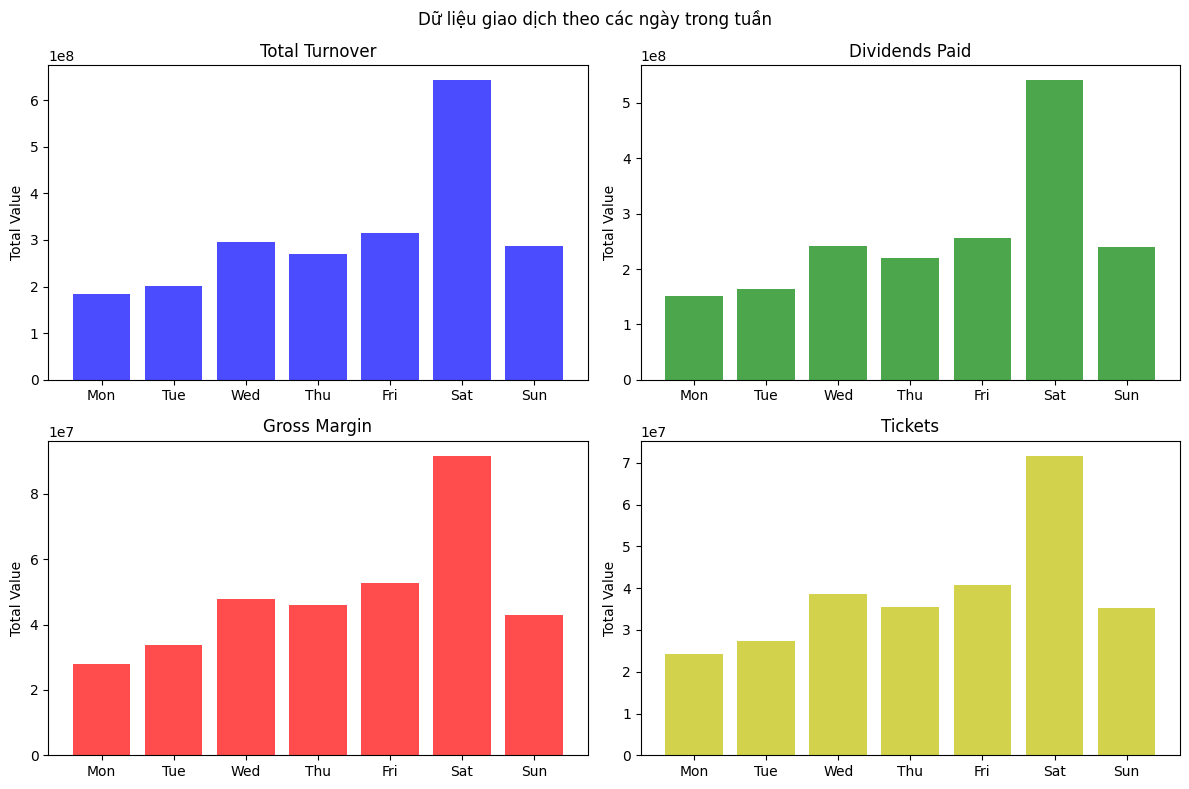

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Dữ liệu giao dịch theo các ngày trong tuần')

# Biểu đồ cho TOTAL_TURNOVER
axes[0, 0].bar(Wresults.index, Wresults['TOTAL_TURNOVER'], color='b', alpha=0.7)
axes[0, 0].set_title('Total Turnover')
axes[0, 0].set_ylabel('Total Value')

# Biểu đồ cho DIVIDENDS_PAID
axes[0, 1].bar(Wresults.index, Wresults['DIVIDENDS_PAID'], color='g', alpha=0.7)
axes[0, 1].set_title('Dividends Paid')
axes[0, 1].set_ylabel('Total Value')

# Biểu đồ cho GROSS_MARGIN
axes[1, 0].bar(Wresults.index, Wresults['GROSS_MARGIN'], color='r', alpha=0.7)
axes[1, 0].set_title('Gross Margin')
axes[1, 0].set_ylabel('Total Value')

# Biểu đồ cho TICKETS
axes[1, 1].bar(Wresults.index, Wresults['TICKETS'], color='y', alpha=0.7)
axes[1, 1].set_title('Tickets')
axes[1, 1].set_ylabel('Total Value')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [59]:
grouped_Month = transactionData.groupby(['MONTH_OF_YEAR'])
Mresults = grouped_Month[['TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS']].sum()
Mresults = Mresults.sort_index()
Mresults

,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
MONTH_OF_YEAR,,,,
1,1.779470e+08,1.456245e+08,2.952432e+07,22310318
2,1.608173e+08,1.324194e+08,2.602857e+07,20031943
3,1.768361e+08,1.458636e+08,2.835347e+07,21955419
4,1.823244e+08,1.494721e+08,2.947412e+07,22658603
5,1.734141e+08,1.427349e+08,2.776442e+07,22006830
6,1.639361e+08,1.350401e+08,2.555565e+07,21136700
7,1.883711e+08,1.555589e+08,2.962988e+07,24665138
8,1.726793e+08,1.411187e+08,2.832453e+07,22368420
9,1.817811e+08,1.490792e+08,2.931556e+07,22437132


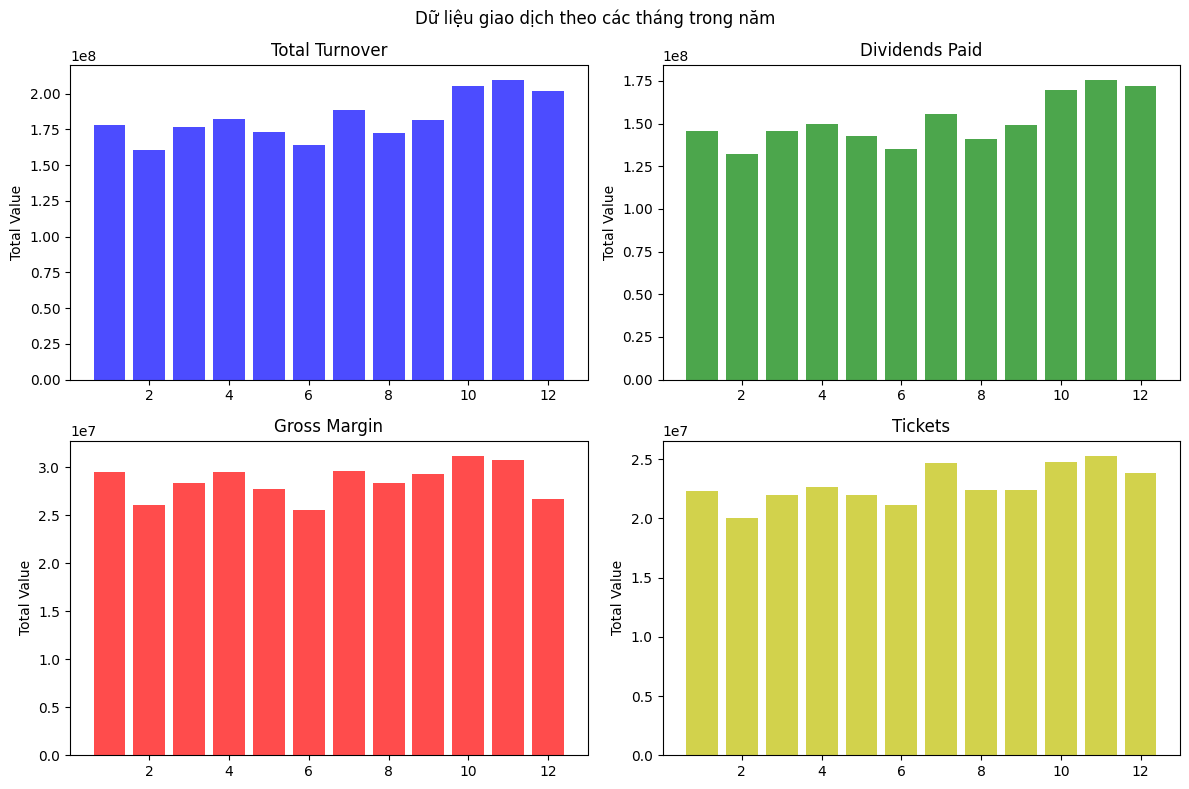

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Dữ liệu giao dịch theo các tháng trong năm')

# Biểu đồ cho TOTAL_TURNOVER
axes[0, 0].bar(Mresults.index, Mresults['TOTAL_TURNOVER'], color='b', alpha=0.7)
axes[0, 0].set_title('Total Turnover')
axes[0, 0].set_ylabel('Total Value')

# Biểu đồ cho DIVIDENDS_PAID
axes[0, 1].bar(Mresults.index, Mresults['DIVIDENDS_PAID'], color='g', alpha=0.7)
axes[0, 1].set_title('Dividends Paid')
axes[0, 1].set_ylabel('Total Value')

# Biểu đồ cho GROSS_MARGIN
axes[1, 0].bar(Mresults.index, Mresults['GROSS_MARGIN'], color='r', alpha=0.7)
axes[1, 0].set_title('Gross Margin')
axes[1, 0].set_ylabel('Total Value')

# Biểu đồ cho TICKETS
axes[1, 1].bar(Mresults.index, Mresults['TICKETS'], color='y', alpha=0.7)
axes[1, 1].set_title('Tickets')
axes[1, 1].set_ylabel('Total Value')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

<ipython-input-61-76d2dab11245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['YEAR'] = transactionData['DATE_DIM'].dt.year
<ipython-input-61-76d2dab11245>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = transactionData.groupby(['YEAR', 'MONTH_OF_YEAR']).sum().reset_index()


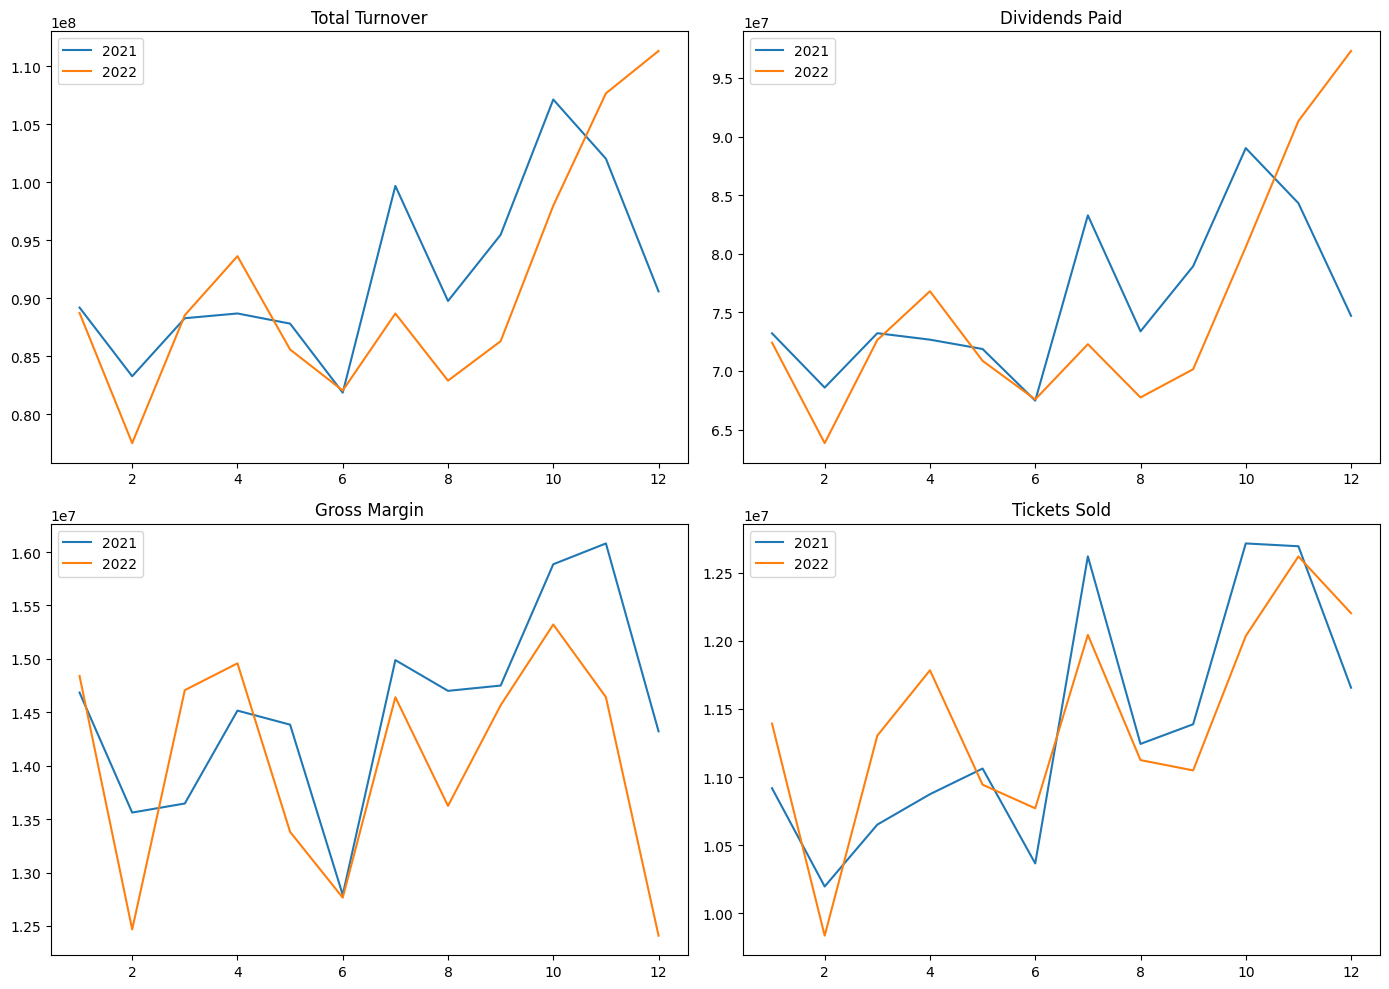

In [61]:
transactionData['YEAR'] = transactionData['DATE_DIM'].dt.year
grouped_data = transactionData.groupby(['YEAR', 'MONTH_OF_YEAR']).sum().reset_index()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total turnover
axes[0, 0].plot(grouped_data[grouped_data['YEAR'] == 2021]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2021]['TOTAL_TURNOVER'], label='2021')
axes[0, 0].plot(grouped_data[grouped_data['YEAR'] == 2022]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2022]['TOTAL_TURNOVER'], label='2022')
axes[0, 0].set_title('Total Turnover')
axes[0, 0].legend()

# Dividends paid
axes[0, 1].plot(grouped_data[grouped_data['YEAR'] == 2021]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2021]['DIVIDENDS_PAID'], label='2021')
axes[0, 1].plot(grouped_data[grouped_data['YEAR'] == 2022]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2022]['DIVIDENDS_PAID'], label='2022')
axes[0, 1].set_title('Dividends Paid')
axes[0, 1].legend()

# Gross margin
axes[1, 0].plot(grouped_data[grouped_data['YEAR'] == 2021]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2021]['GROSS_MARGIN'], label='2021')
axes[1, 0].plot(grouped_data[grouped_data['YEAR'] == 2022]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2022]['GROSS_MARGIN'], label='2022')
axes[1, 0].set_title('Gross Margin')
axes[1, 0].legend()

# Tickets sold
axes[1, 1].plot(grouped_data[grouped_data['YEAR'] == 2021]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2021]['TICKETS'], label='2021')
axes[1, 1].plot(grouped_data[grouped_data['YEAR'] == 2022]['MONTH_OF_YEAR'], grouped_data[grouped_data['YEAR'] == 2022]['TICKETS'], label='2022')
axes[1, 1].set_title('Tickets Sold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [62]:
pd.set_option('display.max_rows', None)

# Tạo DataFrame từ dữ liệu
comparison_data = {
    'Metric': ['Total Turnover', 'Dividends Paid', 'Gross Margin', 'Tickets Sold'],
    '2021_Monthly_Values': [
        grouped_data[grouped_data['YEAR'] == 2021]['TOTAL_TURNOVER'].values,
        grouped_data[grouped_data['YEAR'] == 2021]['DIVIDENDS_PAID'].values,
        grouped_data[grouped_data['YEAR'] == 2021]['GROSS_MARGIN'].values,
        grouped_data[grouped_data['YEAR'] == 2021]['TICKETS'].values
    ],
    '2022_Monthly_Values': [
        grouped_data[grouped_data['YEAR'] == 2022]['TOTAL_TURNOVER'].values,
        grouped_data[grouped_data['YEAR'] == 2022]['DIVIDENDS_PAID'].values,
        grouped_data[grouped_data['YEAR'] == 2022]['GROSS_MARGIN'].values,
        grouped_data[grouped_data['YEAR'] == 2022]['TICKETS'].values
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df

,Metric,2021_Monthly_Values,2022_Monthly_Values
0,Total Turnover,"[89206329.65, 83289608.42, 88288046.8, 8869586...","[88740691.36, 77527694.48, 88548080.0, 9362851..."
1,Dividends Paid,"[73208582.27, 68580288.85, 73221311.0, 7267051...","[72415913.43, 63839097.74, 72642242.64, 768016..."
2,Gross Margin,"[14684632.259065315, 13561192.499658763, 13646...","[14839686.412000636, 12467377.703584455, 14707..."
3,Tickets Sold,"[10917900, 10196467, 10650917, 10874257, 11062...","[11392418, 9835476, 11304502, 11784346, 109440..."


### 2.2.4 Correlation between original data variables

<ipython-input-63-7d688f9d9426>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_without_null_age.corr()


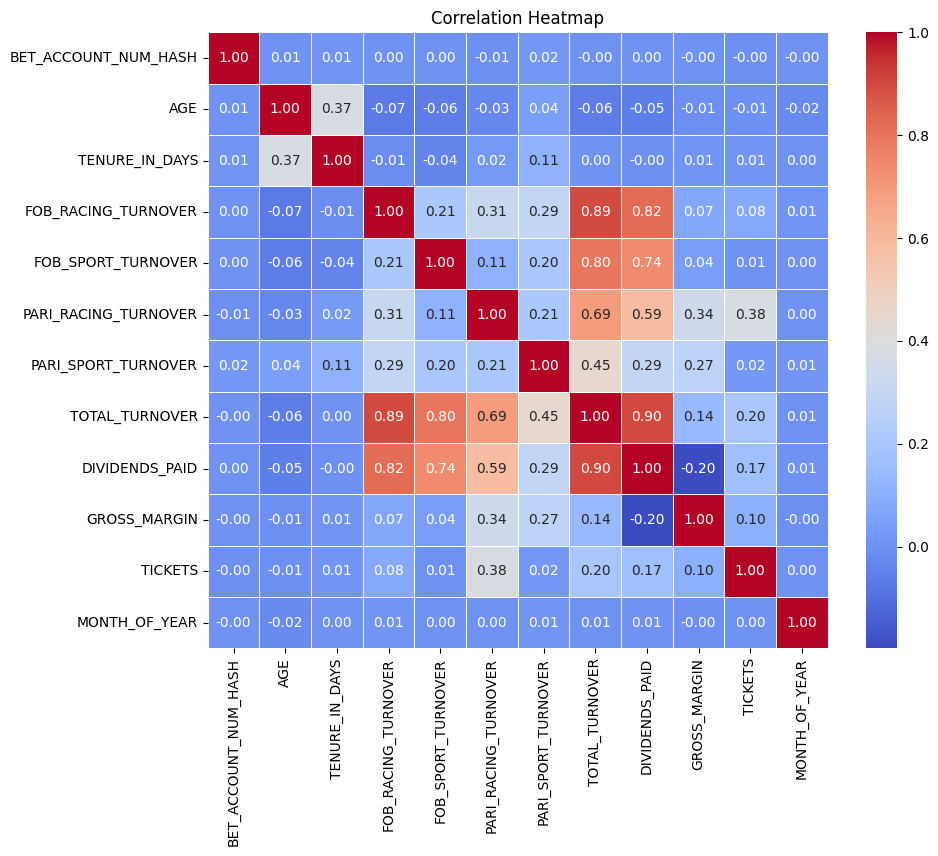

In [63]:
correlation_matrix = data_without_null_age.corr()
# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
CusData.set_index('BET_ACCOUNT_NUM_HASH')

Output hidden; open in https://colab.research.google.com to view.

In [65]:
CusData.shape

(144859, 6)

In [ ]:
transactionData

## 2.3 Save transformed data

In [ ]:
# export data:
CusData.to_csv('./data/CusData.csv')
transactionData.to_csv('./data/TransactionData.csv')